<a href="https://colab.research.google.com/github/ShankarPoudel441/self-Sub-functions/blob/main/Mask_creration_for_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers
from PIL import Image
from pathlib import Path
import subprocess
import shutil
import datetime

from typing import Tuple

!pip3 install varname
from varname import nameof

# !pip3 install pickle
import pickle
import cv2


from tqdm import tqdm
tqdm.pandas()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [5]:

# test_df_path='/content/drive/MyDrive/CBIS-DDSM/test_two_class_v2.csv'
# train_df_path="/content/drive/MyDrive/CBIS-DDSM/train_two_class_v2.csv"

In [ ]:

# test_df=pd.read_csv(test_df_path)
# test_df

In [ ]:
# image_mask = test_df.groupby("image_file")["mask_path"].apply(list).reset_index(name="list_of_masks")

In [ ]:
# image_mask["no_of_masks"] = image_mask["list_of_masks"].apply(lambda x: len(x))
# image_mask[image_mask["no_of_masks"]>1]

# # len(image_mask["list_of_masks"][3])

In [ ]:
# to_save_test="/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mass/test"
# to_save_train="/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mass/train"

# mask0=image_mask["image_file"][0].split("/")[6]+"full_cancer_nocancer_mask.png"
# to_save_test+"/"+mask0


# image_mask["mask_destination"]=image_mask["image_file"].apply(lambda x: to_save_test+"/"+x.split("/")[6]+"full_cancer_nocancer_mask.png")

In [6]:
def merge_images(list_of_images):
  if len(list_of_images) == 1:
    return cv2.imread(list_of_images[0])
  else:
    img=cv2.imread(list_of_images[0])
    for i in range(len(list_of_images) -1):
      img=img+cv2.imread(list_of_images[i+1])
    return img


In [7]:
to_save_path="/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mass"
test_df_path='/content/drive/MyDrive/CBIS-DDSM/test_two_class_v2.csv'
train_df_path="/content/drive/MyDrive/CBIS-DDSM/train_two_class_v2.csv"

def create_image_mask_csv(to_save_path, ip_csv_path, test_or_train):
  df=pd.read_csv(ip_csv_path)


  image_mask = df.groupby("image_file")["mask_path"].apply(list).reset_index(name="list_of_masks")

  image_mask["no_of_masks"] = image_mask["list_of_masks"].apply(lambda x: len(x))

  image_mask["mask_destination"]=image_mask["image_file"].apply(lambda x: to_save_path+"/"+test_or_train+"/"+x.split("/")[6]+"_full_binary_mask.png")




  image_mask.to_csv(to_save_path+"/"+"Image_mask_"+str(test_or_train)+".csv")
  
  return image_mask



In [8]:
image_mask_test=create_image_mask_csv(to_save_path,test_df_path,"test")
image_mask_test



,image_file,list_of_masks,no_of_masks,mask_destination
0,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
1,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
2,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
3,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
4,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
...,...,...,...,...
322,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
323,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
324,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
325,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...


In [9]:
image_mask_train=create_image_mask_csv(to_save_path,train_df_path,"train")
image_mask_train

,image_file,list_of_masks,no_of_masks,mask_destination
0,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
1,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
2,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
3,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
4,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
...,...,...,...,...
1141,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
1142,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
1143,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...
1144,/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mas...,[/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Ma...,1,/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mas...


In [10]:
image_mask_test.mask_destination[0],image_mask_test.mask_destination[1],image_mask_test.list_of_masks[0],image_mask_test.list_of_masks[1]

('/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mass/test/Mass-Test_P_00016_LEFT_CC_full_binary_mask.png',
 '/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mass/test/Mass-Test_P_00016_LEFT_MLO_full_binary_mask.png',
 ['/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mass-Test_P_00016_LEFT_CC_1/10-04-2016-DDSM-NA-09887/1.000000-cropped images-26184/1-1.jpg'],
 ['/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mass-Test_P_00016_LEFT_MLO_1/10-04-2016-DDSM-NA-15563/1.000000-cropped images-77287/1-1.jpg'])

In [11]:
def merge_images(list_of_images):
  if len(list_of_images) == 1:
    return cv2.imread(list_of_images[0])
  else:
    img=cv2.imread(list_of_images[0])
    for i in range(len(list_of_images) -1):
      img=img+cv2.imread(list_of_images[i+1])
    return img



In [12]:
image_mask_train.mask_destination[1],image_mask_train.mask_destination[0]

('/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mass/train/Mass-Training_P_00001_LEFT_MLO_full_binary_mask.png',
 '/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mass/train/Mass-Training_P_00001_LEFT_CC_full_binary_mask.png')

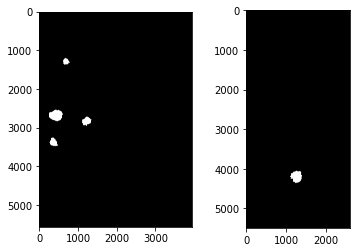

In [16]:
# img_mask=merge_images(image_mask_test["mask_destination"][1])
#Show the image with matplotlib


figs,axes=plt.subplots(1,2)
img_mask=cv2.imread(image_mask_test["mask_destination"][188])
axes[0].imshow(img_mask)

image_mask_test.mask_destination[1]

img_mask=cv2.imread(image_mask_test["mask_destination"][18])
#Show the image with matplotlib
axes[1].imshow(img_mask)

In [ ]:
# def create_and_store_binary_mask(df):
#   df.progress_apply(lambda x: cv2.imwrite(x["mask_destination"], merge_images(x["list_of_masks"])), axis=1)


In [ ]:
# create_and_store_binary_mask(image_mask_test)
# create_and_store_binary_mask(image_mask_train)


In [18]:
arr_test = os.listdir("/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mass/test")
len(arr_test)

327

In [19]:
arr_train = os.listdir("/content/drive/MyDrive/CBIS-DDSM/Unet_mask/mass/train")
len(arr_train)

1146

In [ ]:
# cv2.imwrite(x["mask_destination"], merge_images(x["list_of_masks"]

In [ ]:
# image_mask_test["mask_destination"][0]

In [ ]:
# tf.image.decode_png(image_mask_test["mask_destination"][0])

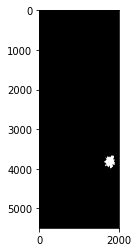

In [ ]:
drop_duplicate_test= test_df[["image_file","pathology"]].drop_duplicates()

In [ ]:
idx1 = pd.Index(image_mask.image_file)
idx2 = pd.Index(drop_duplicate_test.image_file)

idx1.difference(idx2).values


array([], dtype=object)

In [ ]:
def cropBorders(img, l=0.01, r=0.01, u=0.04, d=0.04):

    nrows, ncols = img.shape

    # Get the start and end rows and columns
    l_crop = int(ncols * l)
    r_crop = int(ncols * (1 - r))
    u_crop = int(nrows * u)
    d_crop = int(nrows * (1 - d))

    cropped_img = img[u_crop:d_crop, l_crop:r_crop]

    return cropped_img


def minMaxNormalise(img):

    norm_img = (img - img.min()) / (img.max() - img.min())

    return norm_img

def globalBinarise(img, thresh, maxval):

    binarised_img = np.zeros(img.shape, np.uint8)
    binarised_img[img >= thresh] = maxval

    return binarised_img

def editMask(mask, ksize=(23, 23), operation="open"):

    kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=ksize)

    if operation == "open":
        edited_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    elif operation == "close":
        edited_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Then dilate
    edited_mask = cv2.morphologyEx(edited_mask, cv2.MORPH_DILATE, kernel)

    return edited_mask

def sortContoursByArea(contours, reverse=True):

    # Sort contours based on contour area.
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=reverse)

    # Construct the list of corresponding bounding boxes.
    bounding_boxes = [cv2.boundingRect(c) for c in sorted_contours]

    return sorted_contours, bounding_boxes

def xLargestBlobs(mask, top_x=None, reverse=True):

    # Find all contours from binarised image.
    # Note: parts of the image that you want to get should be white.
    contours, hierarchy = cv2.findContours(
        image=mask, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE
    )

    n_contours = len(contours)

    # Only get largest blob if there is at least 1 contour.
    if n_contours > 0:

        # Make sure that the number of contours to keep is at most equal
        # to the number of contours present in the mask.
        if n_contours < top_x or top_x == None:
            top_x = n_contours

        # Sort contours based on contour area.
        sorted_contours, bounding_boxes = sortContoursByArea(
            contours=contours, reverse=reverse
        )

        # Get the top X largest contours.
        X_largest_contours = sorted_contours[0:top_x]

        # Create black canvas to draw contours on.
        to_draw_on = np.zeros(mask.shape, np.uint8)

        # Draw contours in X_largest_contours.
        X_largest_blobs = cv2.drawContours(
            image=to_draw_on,  # Draw the contours on `to_draw_on`.
            contours=X_largest_contours,  # List of contours to draw.
            contourIdx=-1,  # Draw all contours in `contours`.
            color=1,  # Draw the contours in white.
            thickness=-1,  # Thickness of the contour lines.
        )

    return n_contours, X_largest_blobs


def applyMask(img, mask):

    masked_img = img.copy()
    masked_img[mask == 0] = 0

    return masked_img


def checkLRFlip(mask):

    # Get number of rows and columns in the image.
    nrows, ncols = mask.shape
    x_center = ncols // 2
    y_center = nrows // 2

    # Sum down each column.
    col_sum = mask.sum(axis=0)
    # Sum across each row.
    row_sum = mask.sum(axis=1)

    left_sum = sum(col_sum[0:x_center])
    right_sum = sum(col_sum[x_center:-1])

    if left_sum < right_sum:
        LR_flip = True
    else:
        LR_flip = False

    return LR_flip


def makeLRFlip(img):

    flipped_img = np.fliplr(img)

    return flipped_img


def clahe(img, clip=2.0, tile=(8, 8)):

    img = cv2.normalize(
        img,
        None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX,
        dtype=cv2.CV_32F,
    )
    img_uint8 = img.astype("uint8")

    clahe_create = cv2.createCLAHE(clipLimit=clip, tileGridSize=tile)
    clahe_img = clahe_create.apply(img_uint8)

    return clahe_img

def pad(img):

    nrows, ncols = img.shape

    # If padding is required...
    if nrows != ncols:

        # Take the longer side as the target shape.
        if ncols < nrows:
            target_shape = (nrows, nrows)
        elif nrows < ncols:
            target_shape = (ncols, ncols)

        # pad.
        padded_img = np.zeros(shape=target_shape)
        padded_img[:nrows, :ncols] = img

    # If padding is not required...
    elif nrows == ncols:

        # Return original image.
        padded_img = img

    return padded_img

In [ ]:
l=.001
r=.04
d=.01
u=0.1
thresh=0.1
maxval=1
ksize=23 
operation="open"
reverse=True
top_x=1
clip=2.0
tile=8


def fullMammoPreprocess(img,
                        l=l,
                        r=r,
                        d=d,
                        u=u,
                        thresh=thresh,
                        maxval=maxval,
                        ksize=ksize, 
                        operation=operation,
                        reverse=reverse,
                        top_x=top_x,
                        clip=clip,
                        tile=tile):

    # Step 1: Initial crop.
    cropped_img = cropBorders(img=img, l=l, r=r, d=d, u=u)

    # Step 2: Min-max normalise.
    norm_img = minMaxNormalise(img=cropped_img)

    # Step 3: Remove artefacts.
    binarised_img = globalBinarise(img=norm_img, thresh=thresh, maxval=maxval)
    edited_mask = editMask(
        mask=binarised_img, ksize=(ksize, ksize), operation=operation
    )
    _, xlargest_mask = xLargestBlobs(mask=edited_mask, top_x=top_x, reverse=reverse)

    masked_img = applyMask(img=norm_img, mask=xlargest_mask)

    # Step 4: Horizontal flip.
    lr_flip = checkLRFlip(mask=xlargest_mask)
    if lr_flip:
        flipped_img = makeLRFlip(img=masked_img)
    elif not lr_flip:
        flipped_img = masked_img

    # Step 5: CLAHE enhancement.
    clahe_img = clahe(img=flipped_img, clip=clip, tile=(tile, tile))

    # Step 6: pad.
    padded_img = pad(img=clahe_img)
    padded_img = cv2.normalize(
        padded_img,
        None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX,
        dtype=cv2.CV_32F,
    )

    # Step 7: Min-max normalise.
    img_pre = minMaxNormalise(img=padded_img)

    return img_pre, lr_flip



def maskPreprocess(mask, 
                   lr_flip,
                   l=l,
                   r=r,
                   d=d,
                   u=u):

    # Step 1: Initial crop.
    cropped_img = cropBorders(img=mask, l=l, r=r, d=d, u=u)

    # Step 2: Horizontal flip.
    if lr_flip:
        cropped_img = makeLRFlip(img=cropped_img)

    # Step 3: Pad.
    mask_pre = pad(img=cropped_img)

    return mask_pre